# -1 Jupyter notebook specific - of no further interest

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# 0 Load required packages

In [5]:
# External dependencies
import time
from casadi import *
from plot_efficient_frontier import plot_frontier_carlos as plot_frontier

# Internal dependencies
from life_cycle_gradient_descent import run_sim as run_sim_gradient
from life_cycle_gradient_descent import multi_gradient_descent_step
from lifecycle import *
from auxiliary_functions import init_optimization_problem
from main import execute_moo_optimization
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# 1 Set up life-cycle environment 

### 1.2 Set environment parameter

In [76]:
conf = {
        'tax_setting': 5,       # tax setting: see below for detailed explanation
        'beta': 0.95,           # Utility discounting
        'r_debt': 0.15,         # debt interest rate
        'r': 0.05,
        'T': 60,                # agent's maturity
        'T_ret': 45,            # retirement age
        'L_max': 10,            # maximum labour 
        'gamma': [0.5],         # Agent's utility from consumption
        'eta': [1],             # Agent's disutility from labour
        'plot': False,
        'plot_steps': False,
        'plot_GD_steps': True,
        'h': 1E-6,              # step size finite difference 
        'n_steps_max': 20,      # max number of steps for 1 point on pareto frontier
        'k_max': 40,            # max number of steps for bi-linear search
        'tol': 1E-3,            # tolerance TODO explanation
        'tol_line_search': 1E-8,# tolerance to abort line search
        'serial': False,
        'max_debt': 2,
        'costb': 0.02,
        'borrowing': np.inf,     # np.inf -> allow unlimited borrowing // 0 -> allow no borrowing
        'n_starting_points': 50 # number of starting points for "frontier searching"
        }

### 1.3 Set up Optimization Problem

# 2 Compute Pareto Frontier

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [77]:
result_array, intermediate = execute_moo_optimization(conf)

Elapsed time 119.79144406318665 
 n_procs  11 
 n_points  29


In [78]:
[pv_rev_d, pv_util_d, tk_d, tl_d, tc_d] = result_array.tolist()

In [79]:
intermediate[0]

{'util': [DM(51.7505), DM(51.7505), DM(51.7515), DM(51.7516), DM(51.7516)],
 'rev': [DM(103.349), DM(103.375), DM(103.375), DM(103.375), DM(103.375)],
 'tax_rates': [array([0.02221193, 0.5921961 , 0.0141796 ]),
  array([0.01880547, 0.59810758, 0.        ]),
  array([0.01196401, 0.59830623, 0.        ]),
  array([0.01036899, 0.59835533, 0.        ]),
  array([0.00991703, 0.59836943, 0.        ])]}

In [ ]:
intermediate[0]

In [70]:
tt.reshape([1])[0]

{'util': [DM(80.2306),
  DM(80.2529),
  DM(80.2529),
  DM(80.2533),
  DM(80.2535),
  DM(80.2535),
  DM(80.2536),
  DM(80.2536),
  DM(80.2536),
  DM(80.2536),
  DM(80.2536),
  DM(80.2536)],
 'rev': [DM(45.9978),
  DM(45.9978),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597),
  DM(46.0597)],
 'tax_rates': [array([0.00967124, 0.17553369, 0.04784589]),
  array([0.02588984, 0.19293573, 0.02432782]),
  array([0.01655142, 0.21292446, 0.        ]),
  array([0.01904412, 0.21276776, 0.        ]),
  array([0.02071549, 0.21266458, 0.        ]),
  array([0.02183924, 0.21259604, 0.        ]),
  array([0.02259917, 0.21255008, 0.        ]),
  array([0.02311919, 0.21251881, 0.        ]),
  array([0.02348282, 0.21249703, 0.        ]),
  array([0.02374565, 0.21248133, 0.        ]),
  array([0.023945  , 0.21246944, 0.        ]),
  array([0.02410168, 0.21246011, 0.        ])]}

# 3 Visualize Pareto Frontier Construction

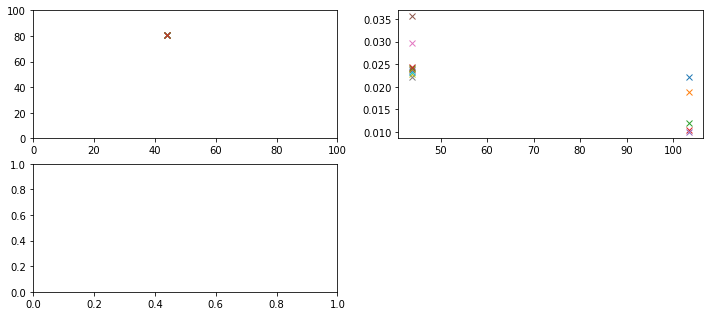

In [89]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(3, 2, 1) 
ax2 = fig.add_subplot(3, 2, 2) 
ax3 = fig.add_subplot(3, 2, 3) 

for i in range(2):#len(pv_rev_d)):
    for j in range(len(intermediate[i]['util'])):
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.plot(intermediate[i]['rev'][j], intermediate[i]['util'][j],marker='x')
        
        ax2.plot(intermediate[i]['rev'][j], intermediate[i]['tax_rates'][j][0],marker='x')
        ax3.plot(intermediate[i]['rev'][j], intermediate[i]['tax_rates'][j][0],marker='x')
        ax2.plot(intermediate[i]['rev'][j], intermediate[i]['tax_rates'][j][0],marker='x')
        display(fig)

        clear_output(wait = True)
        plt.pause(0.5)
    plt.pause(0)

In [ ]:
[pv_rev_d, pv_util_d, tk_d, tl_d, tc_d] = result_array.tolist()

# 3 Postprocessing

In [1]:
[pv_rev_d, pv_util_d, tk_d, tl_d, tc_d] = result_array.tolist()
plot_frontier(pv_rev_d, pv_util_d, tk_d, tl_d, tc_d, conf,
                  timestr + "_gamma_" + str(conf['gamma']) + "_eta_" +
                  str(conf["eta"]) + "_tax_setting_" + str(conf["tax_setting"]))

NameError: name 'result_array' is not defined

In [20]:
tc_global

[0.0]